In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# I am dealing with name in this field
import seaborn as sns
from collections import defaultdict
import operator

In [2]:
train = pd.read_csv('./petfinder-adoption-prediction/train.csv')
test = pd.read_csv('./petfinder-adoption-prediction/test.csv')

train['dataset_type'] = 'train'
test['dataset_type'] = 'test'
all_data = pd.concat([train, test])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
train.drop('Description', axis = 1).head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,PetID,PhotoAmt,AdoptionSpeed,dataset_type
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,86e1089a3,1.0,2,train
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,6296e909a,2.0,0,train
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,3422e4906,7.0,3,train
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,5842f1ff5,8.0,2,train
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,850a43f90,3.0,2,train


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 25 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

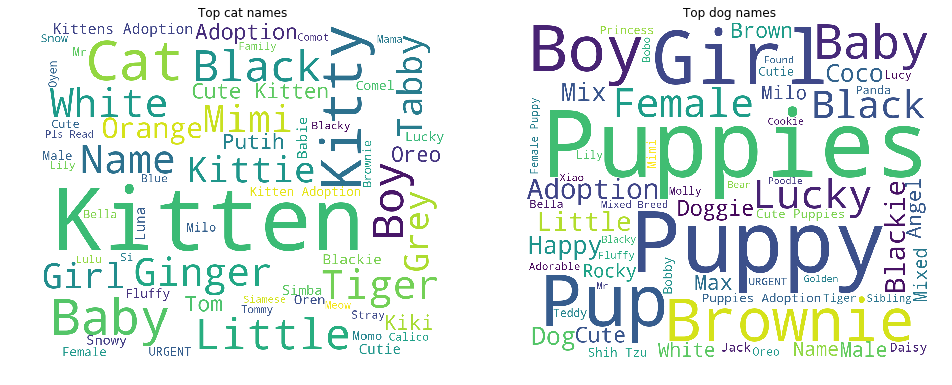

In [5]:
all_data['Type'] = all_data['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')
# type 1 is dog and type 2 is cat

# most of the data analysis is on all_data(include train and test data)

# I think the wordcloud plot is pretty interesting, so I copied it here.
fig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)
text_cat = ' '.join(all_data.loc[all_data['Type'] == 'Cat', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', max_words = 60,
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(all_data.loc[all_data['Type'] == 'Dog', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', max_words = 60,
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

In [6]:
# now let's find the top names in both dog and cat
d_train_dict = defaultdict(int)
c_train_dict = defaultdict(int)
# 1 is dog and 2 is cat.
for i in range(len(train['Name'])):
    if train['Type'][i] == 1:
        d_train_dict[train['Name'][i]] += 1
    elif train['Type'][i] == 2:
        c_train_dict[train['Name'][i]] += 1
sorted_d = sorted(d_train_dict.items(), key = operator.itemgetter(1))
sorted_c = sorted(c_train_dict.items(), key = operator.itemgetter(1))
print(sorted_d[-10:-1])
print(sorted_c[-10:-1])

[('Puppies', 26), ('Bobby', 26), ('Coco', 27), ('Blackie', 31), ('Baby', 32), ('Max', 35), ('Brownie', 44), ('Puppy', 45), ('Lucky', 48)]
[('Snowy', 19), ('Ginger', 20), ('Tiger', 20), ('Kitten', 22), ('Mimi', 33), ('Baby', 34), ('Kitty', 38), ('No Name', 39), ('Kittens', 39)]


In [7]:
# There are many names absent, so here I put 
train['Name'] = train['Name'].fillna('Unnamed')
test['Name'] = test['Name'].fillna('Unnamed')
all_data['Name'] = all_data['Name'].fillna('Unnamed')

# to add 
train['No_name'] = 0
train.loc[train['Name'] == 'Unnamed', 'No_name'] = 1
test['No_name'] = 0
test.loc[test['Name'] == 'Unnamed', 'No_name'] = 1
all_data['No_name'] = 0
all_data.loc[all_data['Name'] == 'Unnamed', 'No_name'] = 1


train_count = 0
all_train = 0
for name in train['Name']:
    all_train += 1
    if name == 'Unnamed' or name == 'No Name' or name == 'No Name Yet':
        train_count += 1
test_count = 0
all_test = 0
for name in test['Name']:
    all_test += 1
    if name == 'Unnamed' or name == 'No Name' or name == 'No Name Yet':
        test_count += 1
print('Rate of unnamed pet in train data: %.3f%%\n'%(train_count*100 / all_train))
print('Rate of unnamed pet in test data: %.3f%%\n'%(test_count*100 / all_test))

Rate of unnamed pet in train data: 8.924%

Rate of unnamed pet in test data: 8.080%



In [8]:
pd.crosstab(train['No_name'], train['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0,1,2,3,4
No_name,,,,,
0,0.027966,0.205302,0.271211,0.221470,0.274051
1,0.020602,0.214739,0.248019,0.172742,0.343899


In [9]:


main_count = train['AdoptionSpeed'].value_counts(normalize=True).sort_index()
def prepare_plot_dict(df, col, main_count):
    """
    Preparing dictionary with data for plotting.
    
    I want to show how much higher/lower are the rates of Adoption speed for the current column comparing to base values (as described higher),
    At first I calculate base rates, then for each category in the column I calculate rates of Adoption speed and find difference with the base rates.
    
    """
    main_count = dict(main_count)
    plot_dict = {}
    for i in df[col].unique():
        val_count = dict(df.loc[df[col] == i, 'AdoptionSpeed'].value_counts().sort_index())

        for k, v in main_count.items():
            if k in val_count:
                plot_dict[val_count[k]] = ((val_count[k] / sum(val_count.values())) / main_count[k]) * 100 - 100
            else:
                plot_dict[0] = 0

    return plot_dict

def make_count_plot(df, x, hue='AdoptionSpeed', title='', main_count=main_count):
    """
    Plotting countplot with correct annotations.
    """
    g = sns.countplot(x=x, data=df, hue=hue);
    plt.title(f'AdoptionSpeed {title}');
    ax = g.axes

    plot_dict = prepare_plot_dict(df, x, main_count)

    for p in ax.patches:
        h = p.get_height() if str(p.get_height()) != 'nan' else 0
        text = f"{plot_dict[h]:.0f}%" if plot_dict[h] < 0 else f"+{plot_dict[h]:.0f}%"
        ax.annotate(text, (p.get_x() + p.get_width() / 2., h),
             ha='center', va='center', fontsize=11, color='green' if plot_dict[h] > 0 else 'red', rotation=0, xytext=(0, 10),
             textcoords='offset points')  
        
def make_factor_plot(df, x, col, title, main_count=main_count, hue=None, ann=True, col_wrap=4):
    """
    Plotting countplot.
    Making annotations is a bit more complicated, because we need to iterate over axes.
    """
    if hue:
        g = sns.factorplot(col, col=x, data=df, kind='count', col_wrap=col_wrap, hue=hue);
    else:
        g = sns.factorplot(col, col=x, data=df, kind='count', col_wrap=col_wrap);
    plt.subplots_adjust(top=0.9);
    plt.suptitle(title);
    ax = g.axes
    plot_dict = prepare_plot_dict(df, x, main_count)
    if ann:
        for a in ax:
            for p in a.patches:
                text = f"{plot_dict[p.get_height()]:.0f}%" if plot_dict[p.get_height()] < 0 else f"+{plot_dict[p.get_height()]:.0f}%"
                a.annotate(text, (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='green' if plot_dict[p.get_height()] > 0 else 'red', rotation=0, xytext=(0, 10),
                     textcoords='offset points')  

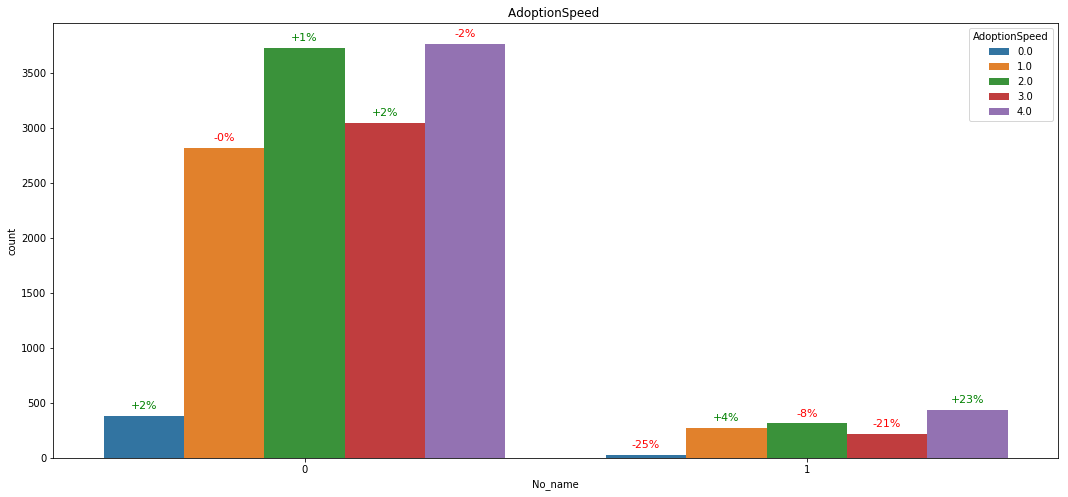

In [10]:
plt.figure(figsize=(18, 8));
make_count_plot(df=all_data, x='No_name', title='')

In [11]:
# next we went on to calculate the average adoption speed to compare with or without name.
list1 = list(train['Name'])
list2 = list(train['AdoptionSpeed'])
with_name_count = 0
with_name_speed = 0.0
without_name_count = 0
without_name_speed = 0.0
for i in range(len(list1)):
    if list1[i] == 'Unnamed' or list1[i] == 'No Name' or list1[i] == 'No Name Yet':
        without_name_count += 1
        without_name_speed += list2[i]
    else:
        with_name_count += 1
        with_name_speed += list2[i]
print('the average adoptionSpeed of pets with_name is: {}'.format(round(with_name_speed / with_name_count, 3)))
print('the average adoptionSpeed of pets without_name is: {}'.format(round(without_name_speed / without_name_count)))

the average adoptionSpeed of pets with_name is: 2.509
the average adoptionSpeed of pets without_name is: 3


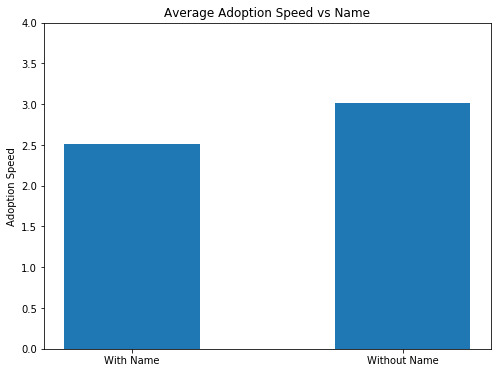

In [32]:
objects = ['With Name', 'Without Name']
performance = [2.51, 3.01]
y_pos = np.arange(len(performance))

plt.figure(figsize = (8,6))
plt.bar(y_pos, performance, align='center', width = 0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Adoption Speed')
plt.ylim(0,4)
plt.title('Average Adoption Speed vs Name')

plt.show()

People tend to adopt pets with name a little bit.  
That's reasonable.

Text(0.5, 0.98, 'Adoption Speed and health conditions')

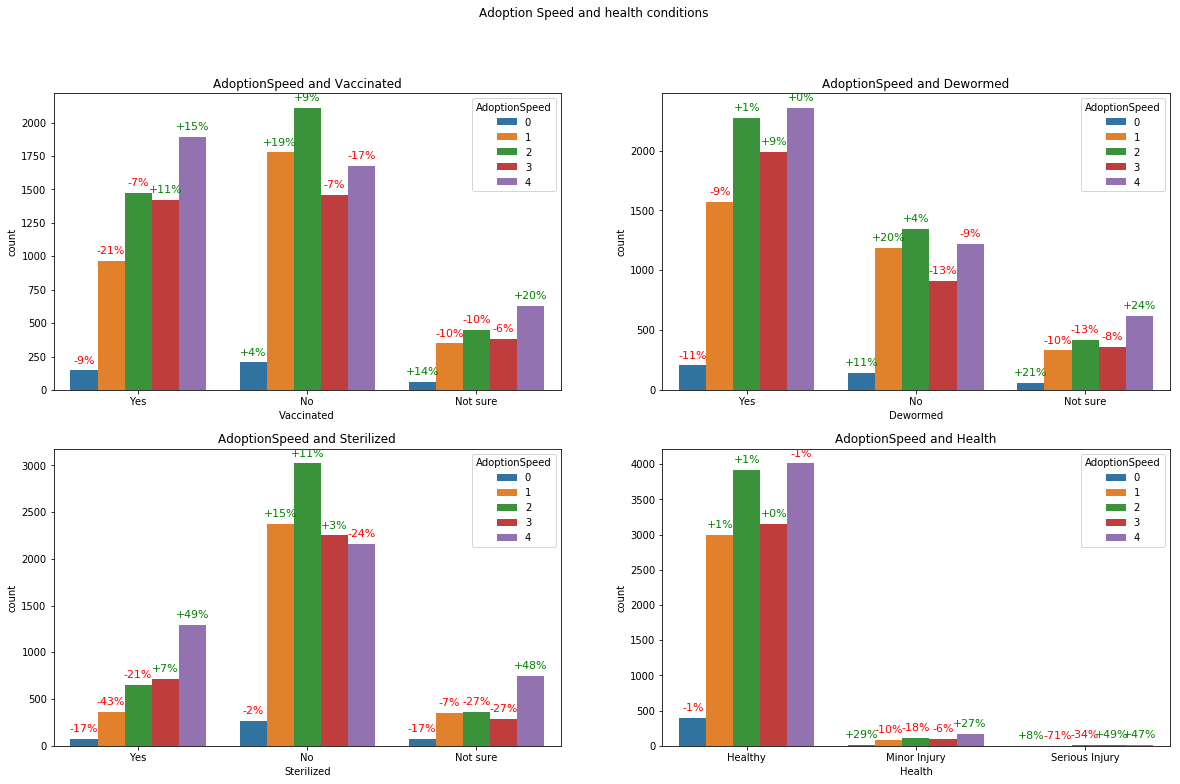

In [20]:
# health related features.


plt.figure(figsize=(20, 12));
plt.subplot(2, 2, 1)
make_count_plot(df=train, x='Vaccinated', title='Vaccinated')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title('AdoptionSpeed and Vaccinated');

plt.subplot(2, 2, 2)
make_count_plot(df=train, x='Dewormed', title='Dewormed')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure'])
plt.title('AdoptionSpeed and Dewormed')

plt.subplot(2, 2, 3)
make_count_plot(df=train, x='Sterilized', title='Sterilized')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure'])
plt.title('AdoptionSpeed and Sterilized')

plt.subplot(2, 2, 4)
make_count_plot(df=train, x='Health', title='Health')
plt.xticks([0, 1, 2], ['Healthy', 'Minor Injury', 'Serious Injury'])
plt.title('AdoptionSpeed and Health')

plt.suptitle('Adoption Speed and health conditions')

Almost all pets are healthy! Pets with minor injuries are rare and sadly they aren't adopted well. Number of pets with serious injuries is negligible.  

It is interesting that people prefer non-vaccinated pets. Maybe they want to bring pets to vets themselves...

People also prefer non-sterilized pets! Maybe they want puppies/kittens 

Quite important is the fact that when there is no information about health condition, the probability of not being adopted is much higher;  


In [21]:
Average_speed_V = [0, 0, 0]
count_V = [0, 0, 0]
Average_speed_D = [0, 0, 0]
count_D = [0, 0, 0]
for i in range(len(train['Vaccinated'])):
    # 1 means yes
    if train['Vaccinated'][i] == 1:
        count_V[0] += 1
        Average_speed_V[0] += train['AdoptionSpeed'][i]
    elif train['Vaccinated'][i] == 2:
        count_V[1] += 1
        Average_speed_V[1] += train['AdoptionSpeed'][i]
    elif train['Vaccinated'][i] == 3:
        count_V[2] += 1
        Average_speed_V[2] += train['AdoptionSpeed'][i]
        
for i in range(len(train['Dewormed'])):
    # 1 means yes
    if train['Dewormed'][i] == 1:
        count_D[0] += 1
        Average_speed_D[0] += train['AdoptionSpeed'][i]
    elif train['Dewormed'][i] == 2:
        count_D[1] += 1
        Average_speed_D[1] += train['AdoptionSpeed'][i]
    elif train['Dewormed'][i] == 3:
        count_D[2] += 1
        Average_speed_D[2] += train['AdoptionSpeed'][i]
        
for i in range(3):
    Average_speed_V[i] /= count_V[i]
    Average_speed_D[i] /= count_D[i]

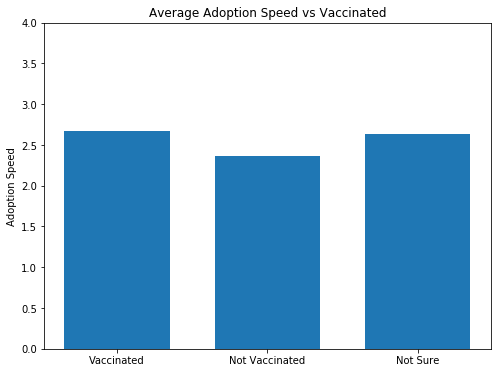

In [22]:
objects = ['Vaccinated', 'Not Vaccinated', 'Not Sure']
performance = Average_speed_V
y_pos = np.arange(len(objects))

plt.figure(figsize = (8,6))
plt.bar(y_pos, performance, align='center', width = 0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Adoption Speed')
plt.ylim(0,4)
plt.title('Average Adoption Speed vs Vaccinated')
 
plt.show()

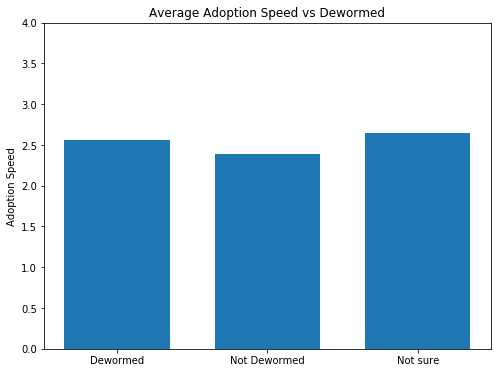

In [31]:
objects = ['Dewormed', 'Not Dewormed', 'Not sure']
performance = Average_speed_D
y_pos = np.arange(len(objects))

plt.figure(figsize = (8,6))
plt.bar(y_pos, performance, align='center', width = 0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Adoption Speed')
plt.ylim(0,4)
plt.title('Average Adoption Speed vs Dewormed')
 
plt.show()

In [24]:
print(train['Fee'].corr(train['Vaccinated']))
print(train['Fee'].corr(train['Dewormed']))
print(train['Fee'].corr(train['Sterilized']))

-0.12186824810616446
-0.10597843896587184
-0.06378983180712837


In [25]:
train.drop(['Name','State','Color3','Color1','Color2','Breed1','Breed2','Type','Age','Gender','Quantity','FurLength','MaturitySize','No_name'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('Blues'), axis=1)

,Vaccinated,Dewormed,Sterilized,Health,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
Vaccinated,1.0,0.72,0.47,0.079,-0.12,-0.033,-0.053,-0.059
Dewormed,0.72,1.0,0.43,0.072,-0.11,-0.037,-0.099,-0.013
Sterilized,0.47,0.43,1.0,0.058,-0.064,-0.019,-0.062,-0.083
Health,0.079,0.072,0.058,1.0,-0.01,-0.005,-0.024,0.029
Fee,-0.12,-0.11,-0.064,-0.01,1.0,-0.00084,0.0051,-0.004
VideoAmt,-0.033,-0.037,-0.019,-0.005,-0.00084,1.0,0.23,-0.00057
PhotoAmt,-0.053,-0.099,-0.062,-0.024,0.0051,0.23,1.0,-0.023
AdoptionSpeed,-0.059,-0.013,-0.083,0.029,-0.004,-0.00057,-0.023,1.0


In [26]:
print(F'Maximum amount of photos is {train["PhotoAmt"].max()}')
print(F'Minimum amount of photos is {train["PhotoAmt"].min()}')

Maximum amount of photos is 30.0
Minimum amount of photos is 0.0


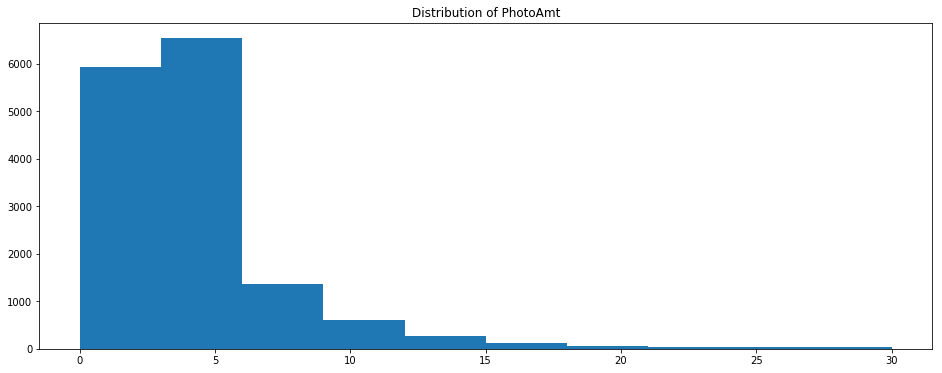

In [27]:
# here is the distribution of photoamount
plt.figure(figsize=(16, 6));
plt.hist(train['PhotoAmt']);
plt.title('Distribution of PhotoAmt');

In [33]:
# now we can calculate the average amount of adoptionSpeed of each photo:
list1 = list(train['PhotoAmt'])
list2 = list(train['AdoptionSpeed'])
# record1 is a dict in the form of (PhotoAmt, [count,  sum of AdoptionSpeed])
record1 = defaultdict(list)
for i in range(len(list1)):
    if list1[i] not in record1.keys():
        record1[list1[i]].append(1)
        record1[list1[i]].append(list2[i])
    else:
        record1[list1[i]][0] += 1
        record1[list1[i]][1] += list2[i]
# next we transfrom record to the form of record = {(PhotoAmt, Average AdoptionSpeed)}
# record2 is in the form of (PhotoAmt, count)
record2 = {}
for key, value in record1.items():
    record2[key] = value[0]
record = {}
for key, value in record1.items():
    record[key] = round(value[1] / value[0], 3)


Text(0.5, 1.0, 'Distribution of Photo Amount')

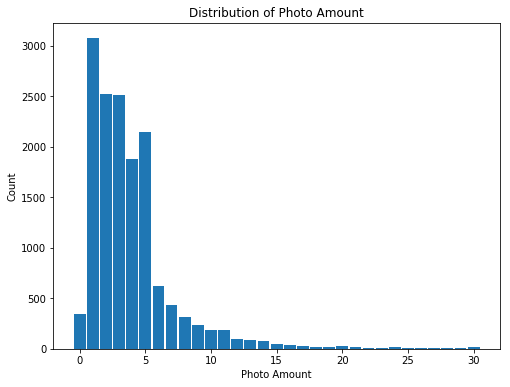

In [35]:
plt.figure(figsize = (8, 6))
lists = sorted(record2.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y, width = 0.9)
plt.xlabel('Photo Amount')
plt.ylabel('Count')
plt.title('Distribution of Photo Amount')

Text(0.5, 1.0, 'correlation between average adoptionSpeed and photoAmt')

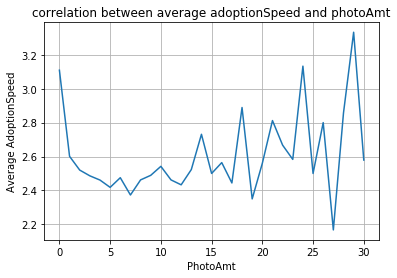

In [49]:
plt.figure(figsize = (6, 4))
lists = sorted(record.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.grid()
plt.xlabel('PhotoAmt')
plt.ylabel('Average AdoptionSpeed')
plt.title('correlation between average adoptionSpeed and photoAmt')

In [50]:
plt.rcParams["figure.figsize"] = [20,15]

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


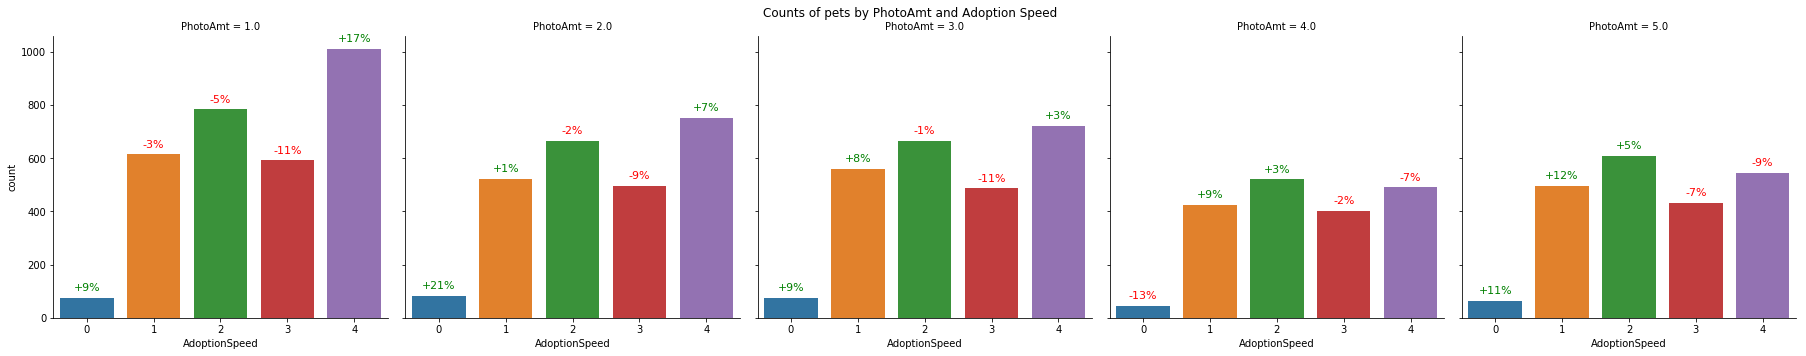

In [51]:
make_factor_plot(df=train.loc[train['PhotoAmt'].isin(list(train.PhotoAmt.value_counts().index[:5]))], x='PhotoAmt', col='AdoptionSpeed', title='Counts of pets by PhotoAmt and Adoption Speed', col_wrap=5)

In [52]:
# it's not sure that amount of photoes has any real influence.

In [53]:
train.drop(['Name', 'No_name','State','Color3','Color1','Color2','Breed1','Breed2','Type','Age','Gender','Quantity','FurLength','MaturitySize', 'Health', 'Fee', 'PhotoAmt', 'VideoAmt'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('Blues'), axis=1)

,Vaccinated,Dewormed,Sterilized,AdoptionSpeed
Vaccinated,1.0,0.72,0.47,-0.059
Dewormed,0.72,1.0,0.43,-0.013
Sterilized,0.47,0.43,1.0,-0.083
AdoptionSpeed,-0.059,-0.013,-0.083,1.0


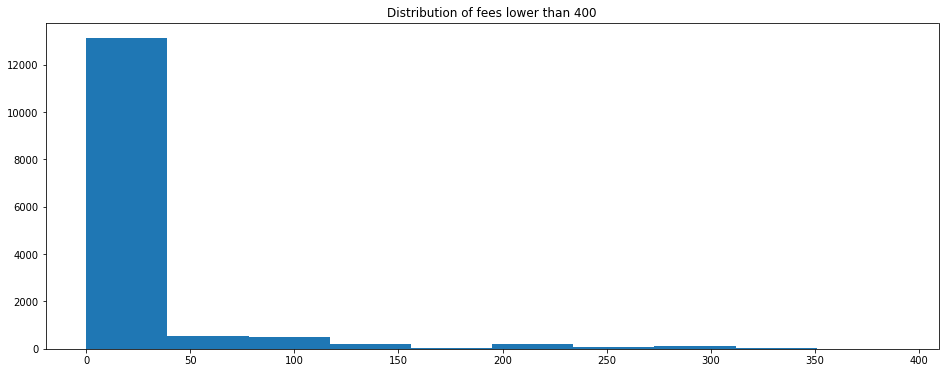

In [116]:
plt.figure(figsize=(16, 6));
plt.hist(train.loc[train['Fee'] < 400, 'Fee']);
plt.title('Distribution of fees lower than 400');

In [25]:
free = 0
not_free = 0
for fee in train['Fee']:
    if fee == 0:
        free += 1
    else:
        not_free += 1
print(free)
print(not_free)
print('percentage of free pets is {}'.format(free/(free+not_free)))

12663
2330
percentage of free is 0.8445941439338358


In [26]:
adoptionSpeed_free = 0
adoptionSpeed_not = 0
for i in range(len(train['Fee'])):
    if train['Fee'][i] == 0:
        adoptionSpeed_free += train['AdoptionSpeed'][i]
    else:
        adoptionSpeed_not += train['AdoptionSpeed'][i]
adoptionSpeed_free = adoptionSpeed_free / free
adoptionSpeed_not /= not_free
print(adoptionSpeed_free)
print(adoptionSpeed_not)
    

2.5066729842849247
2.5695278969957083
